In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [9]:
start='2010-01-01'
end='2024-10-04'
df=yf.download('TSLA', start=start, end=end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-09-27,257.380005,260.700012,254.119995,260.459991,260.459991,70988100
2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700
2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600


In [10]:
df=df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3586,2024-09-27,257.380005,260.700012,254.119995,260.459991,260.459991,70988100
3587,2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700
3588,2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600
3589,2024-10-02,247.550003,251.160004,241.500000,249.020004,249.020004,93983900


In [11]:
df=df.drop(['Date', 'Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3586,257.380005,260.700012,254.119995,260.459991,70988100
3587,259.040009,264.859985,255.770004,261.630005,80705700
3588,262.670013,263.980011,248.529999,258.019989,87397600
3589,247.550003,251.160004,241.500000,249.020004,93983900


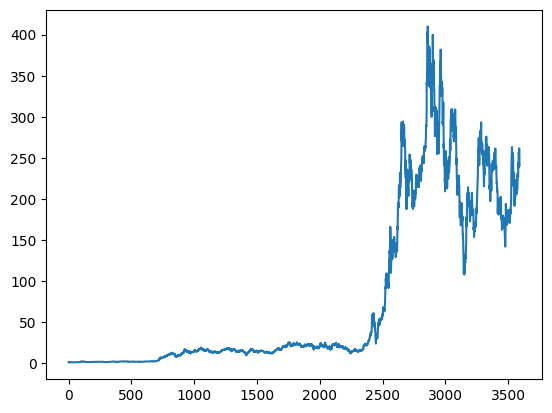

In [13]:
plt.plot(df.Close)

In [14]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3586    209.6881
3587    210.5263
3588    211.3593
3589    212.1298
3590    212.8517
Name: Close, Length: 3591, dtype: float64

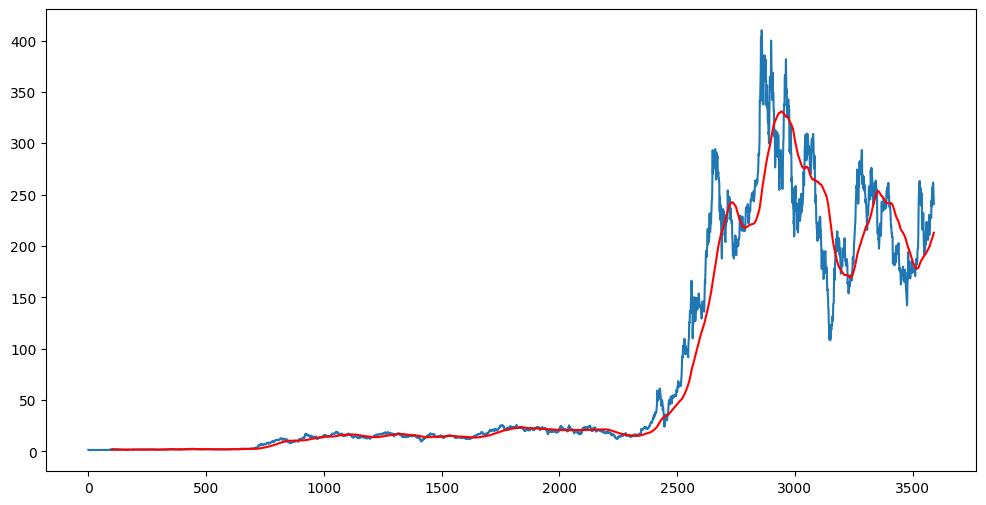

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200=df.Close.rolling(200).mean()


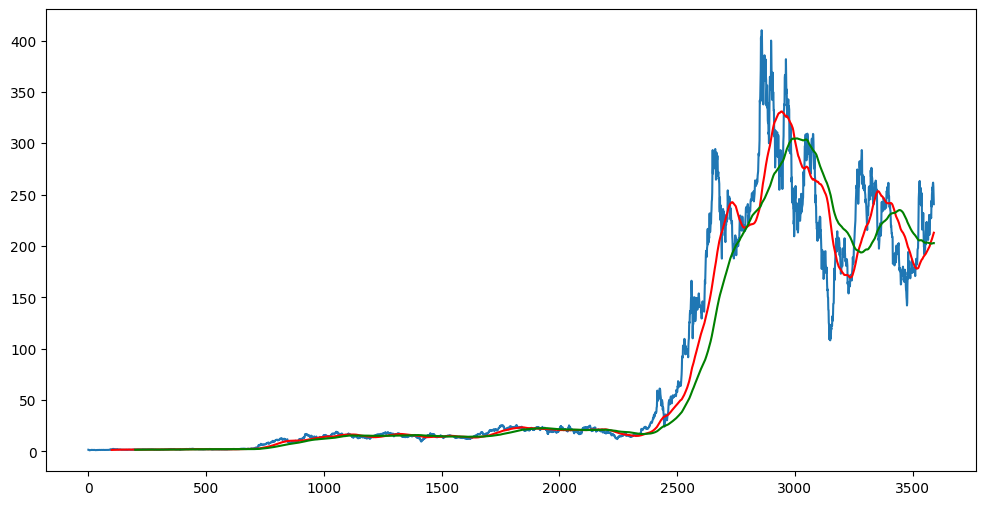

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [23]:
df.shape

(3591, 5)

In [25]:
data_trainning=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_trainning.shape, data_testing.shape)

(2513, 1) (1078, 1)


In [26]:
data_trainning.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [27]:
data_testing.head()

,Close
2513,66.785332
2514,64.056664
2515,65.732002
2516,63.982666
2517,67.290001


In [29]:
scaler=MinMaxScaler(feature_range=(0, 1))

In [31]:
data_trainning_array=scaler.fit_transform(data_trainning)
data_trainning_array

array([[0.00801586],
       [0.00795641],
       [0.00610355],
       ...,
       [0.97910321],
       [0.97607133],
       [0.96955163]])

In [33]:
x_train=[]
y_train=[]
for i in range(100, data_trainning_array.shape[0]):
    x_train.append(data_trainning_array[i-100:i])
    y_train.append(data_trainning_array[i, 0])
x_train, y_train= np.array(x_train), np.array(y_train)

In [38]:
model=Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\nirma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - loss: 0.0237
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0044
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - loss: 0.0043
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - loss: 0.0042
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 221ms/step - loss: 0.0037
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - loss: 0.0033
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - loss: 0.0041
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 226ms/step - loss: 0.0029
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - loss: 0.0029
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - loss: 0.0032
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - loss: 0.0026
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - loss: 0.0028
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - loss: 0.0030
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - loss: 0.0023
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [41]:
model.save('LSTM_model.h5')

In [46]:
# Get the last 100 days from the training set
past_100_days = data_trainning.tail(100)

# Append the test data to the last 100 days of the training data
final_df = pd.concat([past_100_days, data_testing], ignore_index= True)


In [47]:
final_df.head()

,Close
0,42.720669
1,43.371334
2,52.000000
3,59.137333
4,48.980000


In [48]:
input_data= scaler.fit_transform(final_df)
input_data.shape

(1178, 1)

In [49]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test= np.array(x_test), np.array(y_test)

In [50]:
print(x_test.shape, y_test.shape)

(1078, 100, 1) (1078,)


In [51]:
y_predicted=model.predict(x_test)
y_predicted.shape

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


(1078, 1)

In [52]:
scaler.scale_

array([0.00259142])

In [53]:
scale_factor=1/0.00259142
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

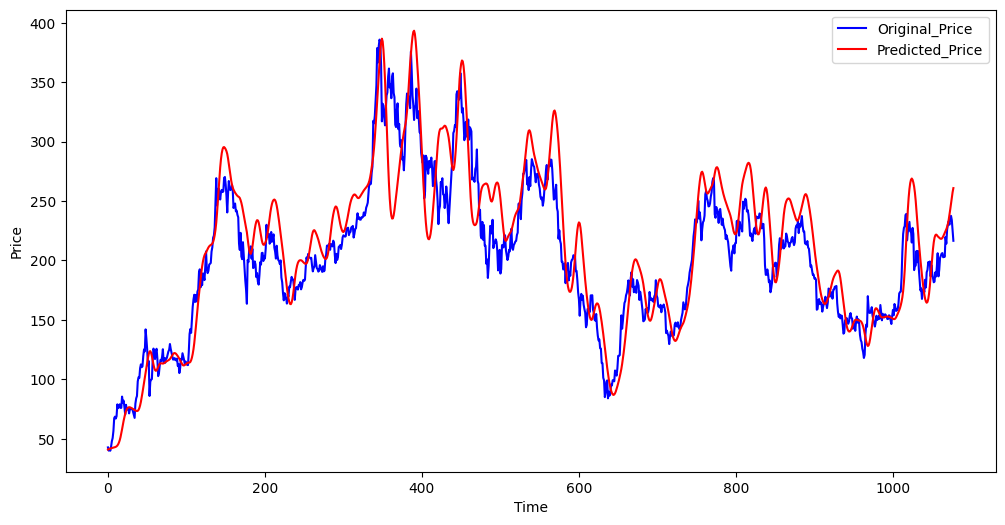

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original_Price')
plt.plot(y_predicted, 'r', label='Predicted_Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()